# Support Vector Machine

Maximize the margin of data near the border.

$$
y=w^T\phi(x)+w_0
$$

φ: Nonlinear basis functions when problems that can not be separated linearly.

if linear problem,
$$
\phi(x)=x
$$

In [26]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Generate data

In [21]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5.0, random_state=42)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


Text(0,0.5,'Figure 2')

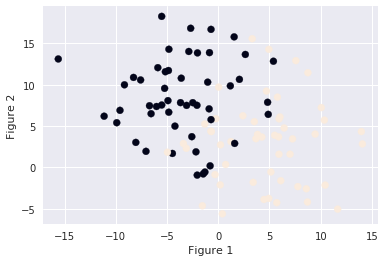

In [22]:
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.xlabel("Figure 1")
plt.ylabel("Figure 2")

## Train and Test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(70, 2)
(30, 2)


In [24]:
svm_clf = SVC(gamma='auto', kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

if Nonlinear, kernel != linear

In [30]:
svm_pred = svm_clf.predict(X_test)
accuracy_score(y_test, svm_pred)

0.8333333333333334

In [29]:
print(classification_report(y_test, svm_pred))

             precision    recall  f1-score   support

          0       0.91      0.71      0.80        14
          1       0.79      0.94      0.86        16

avg / total       0.85      0.83      0.83        30



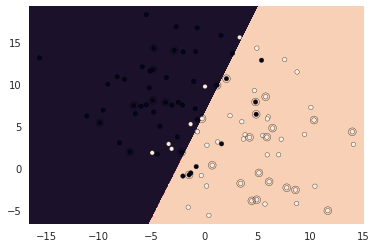

In [59]:
plt.figure()

h=0.02
x_min=X[:,0].min()-1
x_max=X[:,0].max()+1
y_min=X[:,1].min()-1
y_max=X[:,1].max()+1
#make meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=20)
plt.scatter(X_test[:,0], X_test[:,1], facecolors='none', edgecolor='k', s=60)